In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
import subprocess as sub 
import pandas as pd 
# %config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = 'svg'

sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plt.style.use('ggplot')
plot_kwds = {'alpha' : 0.66, 's' : 50, 'linewidths':1}

In [3]:
## Create the points 
moons, _ = data.make_moons(n_samples=50, noise=0.05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
test_data = np.vstack([moons, blobs])
npts = test_data.shape[0]
data_dim = test_data.shape[1]

In [4]:
header="%d %d"%(test_data.shape[0], test_data.shape[1])
np.savetxt("twoD.pts", test_data, fmt='%.2f', delimiter='\t', newline='\n', header=header, footer='', comments='# ', encoding=None)

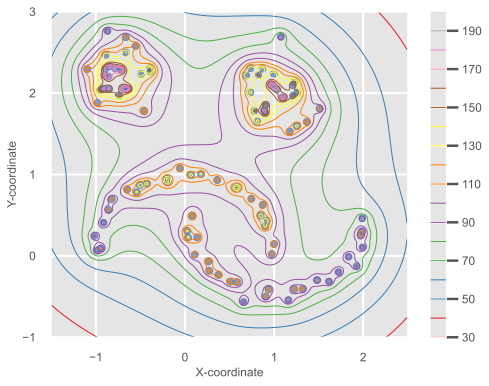

In [5]:

#plot the points 
fig, ax = plt.subplots( figsize=(8,6))
ax.scatter(test_data.T[0], test_data.T[1], color='b', **plot_kwds)
xlim = (-1.5, 2.5)
ylim = (-1,3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel("X-coordinate")
ax.set_ylabel("Y-coordinate")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.rc('font', size=10  )
plt.rcParams.update({'font.size': 8})
# Display the points 

x = np.arange(xlim[0], xlim[1], 0.01)
y = np.arange(ylim[0], ylim[1], 0.01)
xx, yy = np.meshgrid(x, y, sparse=True)
# pt0 = test_data[0]
Z = (xx-xx)*(yy-yy);
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
eps = 1e-3
for pt in test_data:
    Z = Z + 1/np.sqrt(eps+(pt[0]-xx)*(pt[0]-xx) +(pt[1]-yy)*(pt[1]-yy));

cf = ax.contour(x,y,Z, cmap='Set1',linewidths=1, levels=15)
cft = plt.colorbar(cf)
cft.ax.tick_params(labelsize=12)


In [6]:
## Reading the MST
mst = np.loadtxt("twoD.pts.mst", dtype="int")

In [9]:
moons, _ = data.make_moons(n_samples=5, noise=0.05)
blobs, _ = data.make_blobs(n_samples=10, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
td_small = np.vstack([moons, blobs])
npts = td_small.shape[0]
data_dim = td_small.shape[1]
header="%d %d"%(td_small.shape[0], td_small.shape[1])
ptsFileName ="twoD-20.pts" 
np.savetxt(ptsFileName, td_small, fmt='%.2f', delimiter='\t', newline='\n', header=header, footer='', comments='# ', encoding=None)
sub.run(["../a.out", ptsFileName ], capture_output=True)
mstFile = ptsFileName+".mst"
mst = np.loadtxt(mstFile, dtype="int")



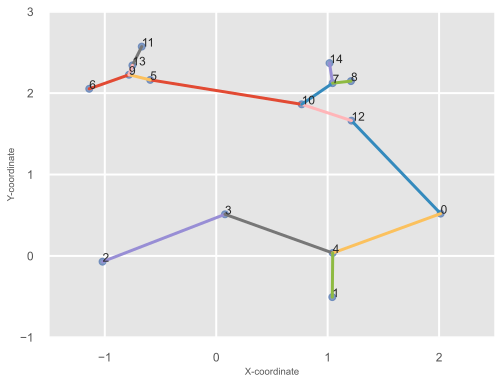

In [10]:
sub.run(["../a.out", ptsFileName ], capture_output=True)
mstFile = ptsFileName+".mst"
mst = np.loadtxt(mstFile, dtype="int")


### Now plot the output 
fig, ax = plt.subplots( figsize=(8,6))
ax.scatter(td_small.T[0], td_small.T[1], color='b', **plot_kwds)
## Annotate 
for pts in range(npts):
    str = "%d"%(pts)
    ax.annotate(str, td_small[pts],fontsize=12)
xlim = (-1.5, 2.5)
ylim = (-1,3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel("X-coordinate")
ax.set_ylabel("Y-coordinate")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.rc('font', size=10  )
plt.rcParams.update({'font.size': 8})
for edge in mst:
    x_values = [td_small[edge[0]][0], td_small[edge[1]][0]]
    y_values = [td_small[edge[0]][1], td_small[edge[1]][1]]
    ax.plot(x_values, y_values)
    # print(edge)
plt.show()

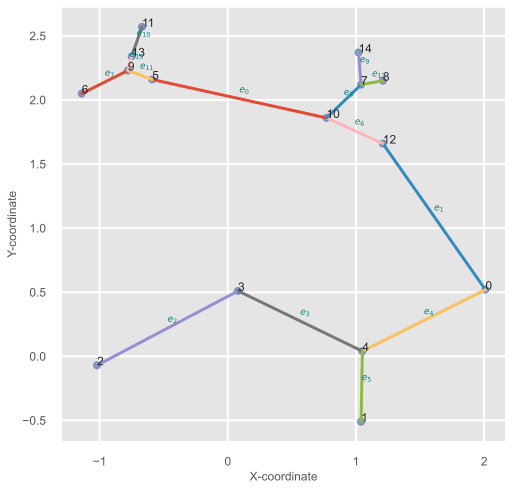

In [3]:
def plotMST(binaryExe, dataFileName):
    dataPoints = np.loadtxt(dataFileName, dtype="double", comments="#") 
    sub.run([binaryExe, dataFileName ], capture_output=True)
    mstFile = dataFileName+".mst"
    mst = np.loadtxt(mstFile, dtype="int")
    ### Now plot the output 
    fig, ax = plt.subplots( figsize=(8,8))
    ax.set_aspect('equal')
    ax.scatter(dataPoints.T[0], dataPoints.T[1], color='b', **plot_kwds)
    ## Annotate 
    npts = dataPoints.shape[0]
    for pts in range(npts):
        str = "%d"%(pts)
        ax.annotate(str, dataPoints[pts],fontsize=12)
    # xlim = (-1.5, 2.5)
    # ylim = (-1,3)
    # ax.set_xlim(xlim)
    # ax.set_ylim(ylim)
    ax.set_xlabel("X-coordinate")
    ax.set_ylabel("Y-coordinate")
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.rc('font', size=10  )
    plt.rcParams.update({'font.size': 8})
    # for edge in mst:
    for idx in range(len(mst)):
        edge = mst[idx]
        x_values = [dataPoints[edge[0]][0], dataPoints[edge[1]][0]]
        y_values = [dataPoints[edge[0]][1], dataPoints[edge[1]][1]]
        ax.plot(x_values, y_values)
        str = r"$e_{%d}$"%(idx)
        dp = [np.sum(x_values)/2, .05+np.sum(y_values)/2]
        ax.annotate(str, dp,fontsize=9, color='teal')
        # print(edge)dataFileName
    plt.show()

plotMST("../a.out", "twoD-20.pts") 

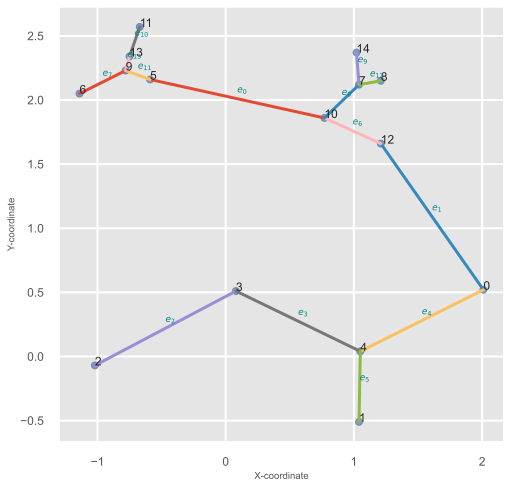

In [29]:
plotMST("../a.out", "twoD-20.pts") 

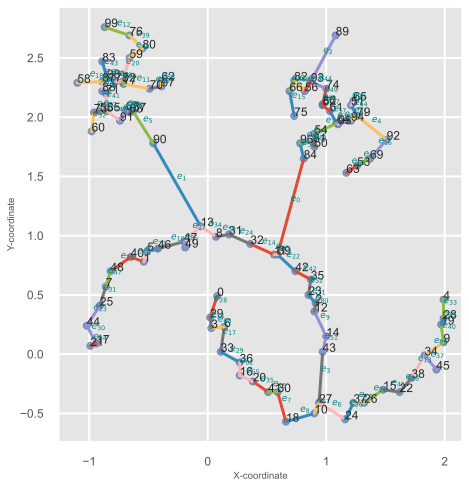

In [4]:
plotMST("../a.out", "twoD.pts")

twoD-20.pts 2
Running: ../a.out twoD-20.pts 2


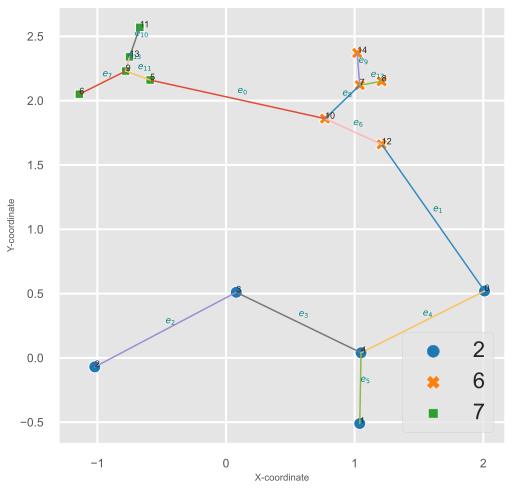

In [61]:
def plotCluster(binaryExe, dataFileName, minClusterSize=2):
    dataPoints = np.loadtxt(dataFileName, dtype="double", comments="#") 
    argString = dataFileName + " %d"%(minClusterSize)
    print(argString)
    cmd  = binaryExe + " " + dataFileName + " %d"%(minClusterSize)
    try:
        print("Running: " + cmd)
        out = sub.check_output(cmd,shell=True)
        
    except sub.CalledProcessError as e:
        print(e.output)
    # sub.run([binaryExe, argString ], capture_output=True)
    mstFile = dataFileName+".mst"
    mst = np.loadtxt(mstFile, dtype="int")
    ### Now plot the output 
    fig, ax = plt.subplots( figsize=(8,16))
    ax.set_aspect('equal')
    # ax.scatter(dataPoints.T[0], dataPoints.T[1], color='b', **plot_kwds)
    
    ## Annotate 
    npts = dataPoints.shape[0]
    for pts in range(npts):
        str = "%d"%(pts)
        ax.annotate(str, dataPoints[pts],fontsize=9)
    # xlim = (-1.5, 2.5)
    # ylim = (-1,3)
    # ax.set_xlim(xlim)
    # ax.set_ylim(ylim)
    ax.set_xlabel("X-coordinate")
    ax.set_ylabel("Y-coordinate")
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.rc('font', size=10  )
    plt.rcParams.update({'font.size': 8})
    # for edge in mst:
    for idx in range(len(mst)):
        edge = mst[idx]
        x_values = [dataPoints[edge[0]][0], dataPoints[edge[1]][0]]
        y_values = [dataPoints[edge[0]][1], dataPoints[edge[1]][1]]
        ax.plot(x_values, y_values, linewidth="1.5")
        str = r"$e_{%d}$"%(idx)
        dp = [np.sum(x_values)/2, .05+np.sum(y_values)/2]
        ax.annotate(str, dp,fontsize=9, color='teal')
        # print(edge)dataFileName
    clstFile = dataFileName+".map"
    clst = np.loadtxt(clstFile, dtype="int")
    # print(dataPoints.T[0])
    df = pd.DataFrame(dataPoints)
    df.columns = ["X-coord","Y-coord"]
    df["Cluster"] = clst 
    sns.scatterplot(data=df, x="X-coord", y="Y-coord", hue="Cluster", style="Cluster", palette="tab10", ax=ax)
    plt.legend(loc='lower right')
    plt.show()

plotCluster("../a.out", "twoD-20.pts") 

twoD-20.pts 4
Running: ../a.out twoD-20.pts 4


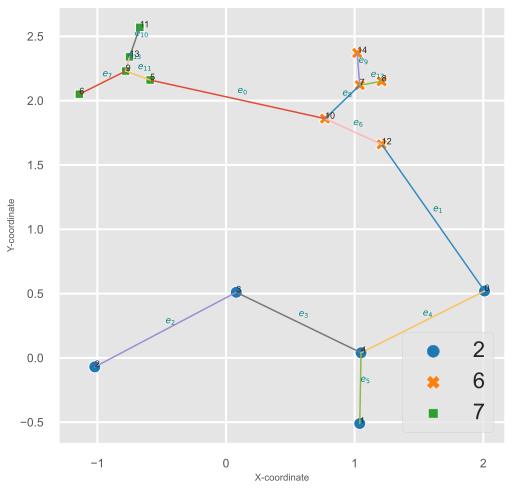

In [65]:
 plotCluster("../a.out", "twoD-20.pts",4 ) 

twoD.pts 2
Running: ../a.out twoD.pts 2


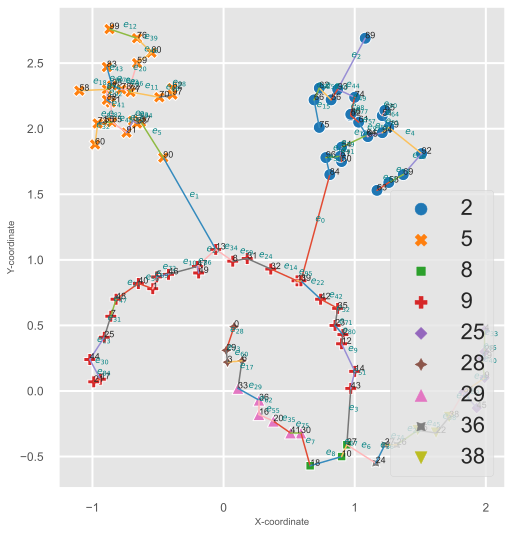

In [62]:
plotCluster("../a.out", "twoD.pts") 

twoD.pts 3
Running: ../a.out twoD.pts 3


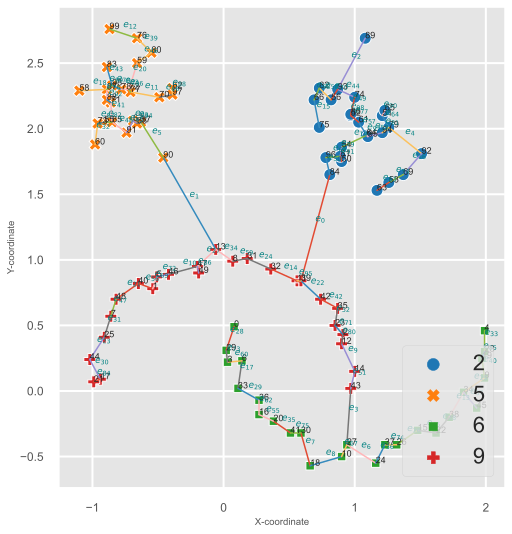

In [63]:
plotCluster("../a.out", "twoD.pts", 3) 

## New cluster extraction

## Comment
The following is an incorrect output from an earlier code 

twoD.pts 2
Running: ../a.out twoD.pts 2


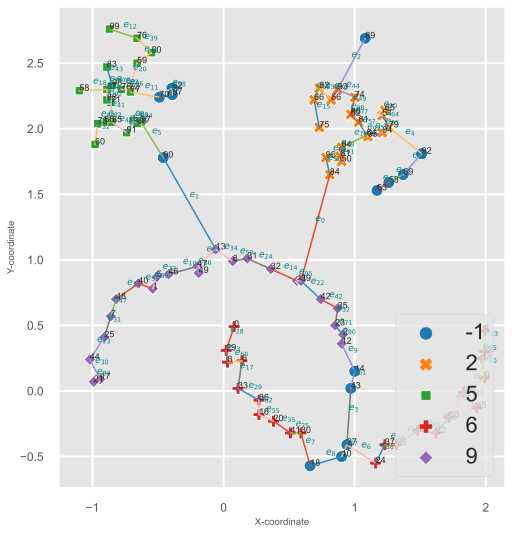

In [83]:
plotCluster("../a.out", "twoD.pts",2 ) 

twoD.pts 2
Running: ../a.out twoD.pts 2


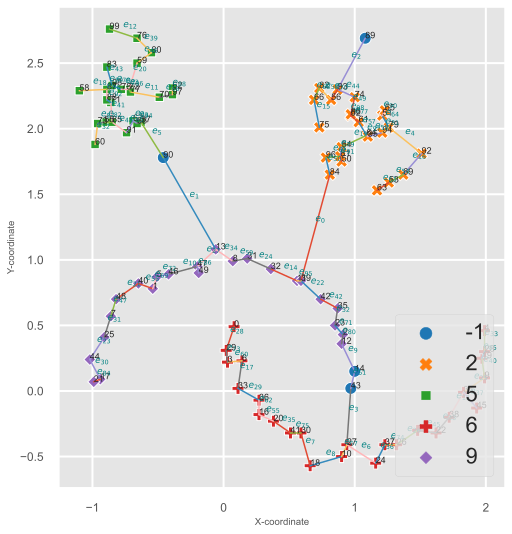

In [84]:
plotCluster("../a.out", "twoD.pts",2 ) 

twoD.pts 5
Running: ../a.out twoD.pts 5


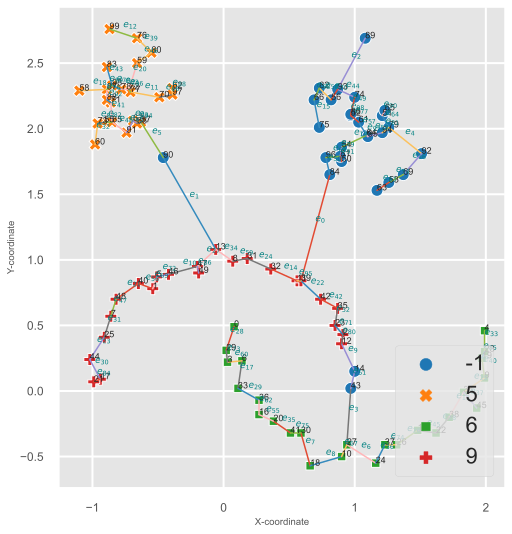

In [85]:
plotCluster("../a.out", "twoD.pts",5 ) 

twoD.pts 3
Running: ../a.out twoD.pts 3


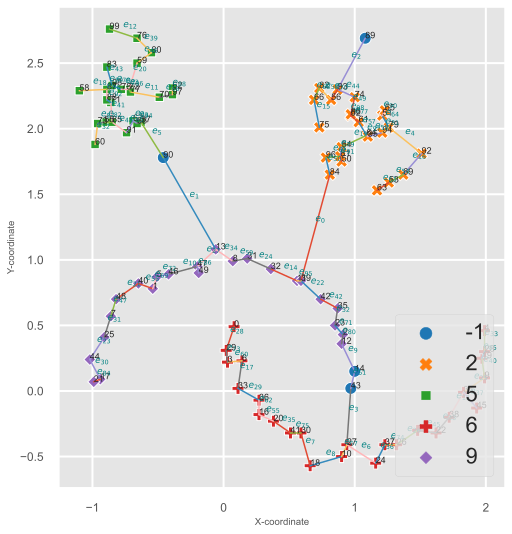

In [86]:
plotCluster("../a.out", "twoD.pts",3 ) 

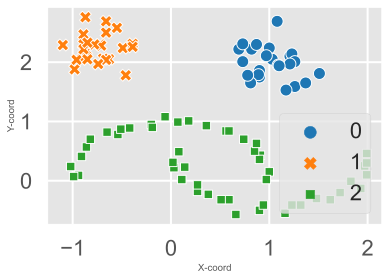

In [94]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
dataFileName= "twoD.pts"
dataPoints = np.loadtxt(dataFileName, dtype="double", comments="#")
clusterer.fit(dataPoints)
clst = clusterer.labels_
    # print(dataPoints.T[0])
df = pd.DataFrame(dataPoints)
df.columns = ["X-coord","Y-coord"]
df["Cluster"] = clst 
sns.scatterplot(data=df, x="X-coord", y="Y-coord", hue="Cluster", style="Cluster", palette="tab10")
plt.legend(loc='lower right')
plt.show()


<AxesSubplot:>

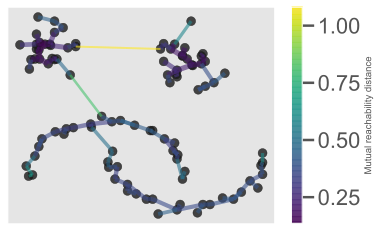

In [98]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', 
                                      edge_alpha=0.6, 
                                      node_size=80, 
                                      edge_linewidth=2)


twoD.pts 3
Running: ../a.out twoD.pts 3


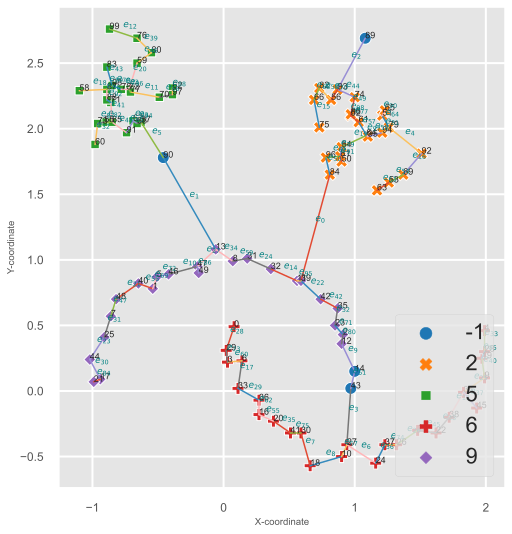

In [97]:
plotCluster("../a.out", "twoD.pts",3 ) 

twoD-20.pts 2
Running: ../a.out twoD-20.pts 2


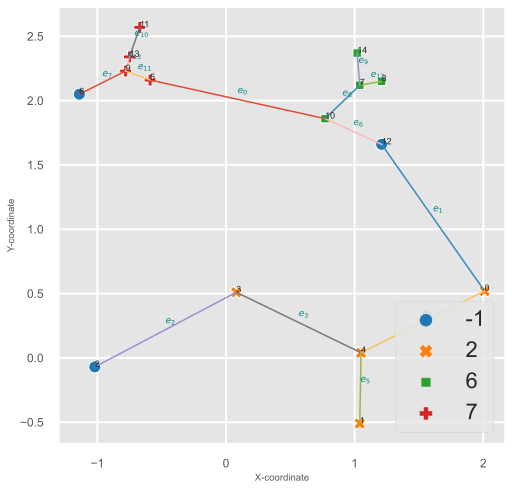

In [99]:
plotCluster("../a.out", "twoD-20.pts",2 ) 

twoD.pts 3
Running: ../a.out twoD.pts 3


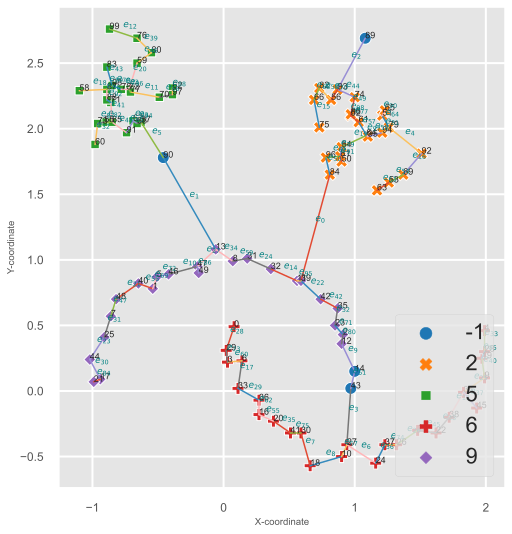

In [100]:
plotCluster("../a.out", "twoD.pts",3 ) 